Question 13

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.mlab as mlab
from scipy.stats import beta
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function


We assume sigma_f^2 is 1 because that only scales y-axis part of space of functions, so this is not considered as important. Real important part is a length scale, which controls the smoothness of the functions.

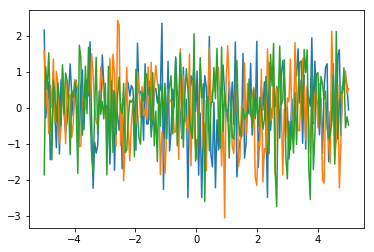

In [95]:
def getPrior(x, lengthscale, number):
    K = np.exp(-cdist(x,x)/lengthscale**2)
    mu = np.zeros(x.shape)
    f = np.random.multivariate_normal(mu.flatten(), K, number)
    return f

x = np.linspace(-5, 5, 200).reshape(-1, 1)
f1 = getPrior(x, 0.01, 3)

plt.plot(x, f1.transpose())

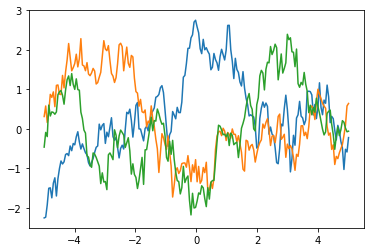

In [97]:
f2 = getPrior(x, 1, 3)
plt.plot(x, f2.transpose())

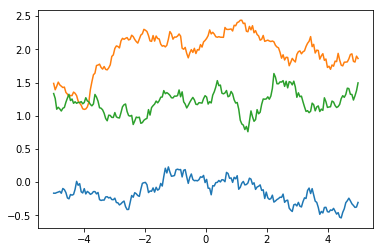

In [98]:
f3 = getPrior(x, 5, 3)
plt.plot(x, f3.transpose())

Question 14

In [113]:
x = np.transpose(np.matrix([-(np.pi), -(2*np.pi/3), -(np.pi/3), 0, np.pi/3, 2*np.pi/3, np.pi]))
e = np.random.normal(0, 0.5, 6)
y = np.sin(x) + e
print(y)

[[ 0.55620722 -0.95326829 -0.12980832 -0.27790879 -0.2134814  -0.16683038]
 [-0.30981818 -1.8192937  -0.99583372 -1.14393419 -1.0795068  -1.03285578]
 [-0.30981818 -1.8192937  -0.99583372 -1.14393419 -1.0795068  -1.03285578]
 [ 0.55620722 -0.95326829 -0.12980832 -0.27790879 -0.2134814  -0.16683038]
 [ 1.42223263 -0.08724289  0.73621709  0.58811661  0.652544    0.69919503]
 [ 1.42223263 -0.08724289  0.73621709  0.58811661  0.652544    0.69919503]
 [ 0.55620722 -0.95326829 -0.12980832 -0.27790879 -0.2134814  -0.16683038]]
